<a href="https://colab.research.google.com/github/BoranOner/Predicting-Diabetes/blob/main/Sat%C4%B1rEksikDengesiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import matplotlib.pyplot as plt    # visualization library (görselleştirme kütüphanesi)
import seaborn as sns         # visualization library (görselleştirme kütüphanesi)
import missingno as msno      # visualization library (görselleştirme kütüphanesi)
 #Hiperparametre için çağırıldı


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#**VERİ GÖRSELLEŞTİRME**

In [2]:
dataFrame = pd.read_csv("https://raw.githubusercontent.com/BoranOner/Predicting-Diabetes/main/diabetes.csv" ,encoding = 'unicode_escape')
print(dataFrame)

     Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]


In [3]:
df1 = dataFrame.copy()
df2 = dataFrame.copy()
df3 = dataFrame.copy()

In [4]:
df1 = pd.DataFrame(df1)

In [5]:
df1.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
df1['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


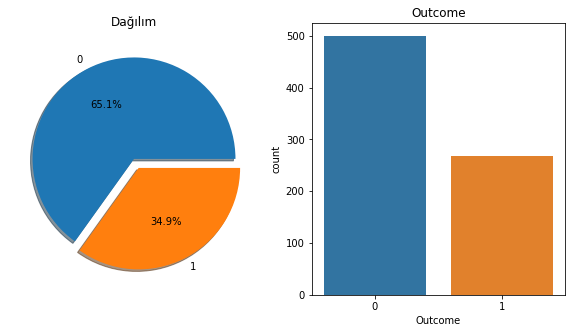

In [9]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df1['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Dağılım')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=df1,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [10]:
df1.isnull().sum()  # null değer gözükmüyor 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df1[["Glucose","BloodPressure",
     "BMI"]] = df1[["Glucose","BloodPressure",
     "BMI"]].replace(0,np.NaN)
df1.isnull().sum()

Pregnancies                  0
Glucose                      5
BloodPressure               35
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

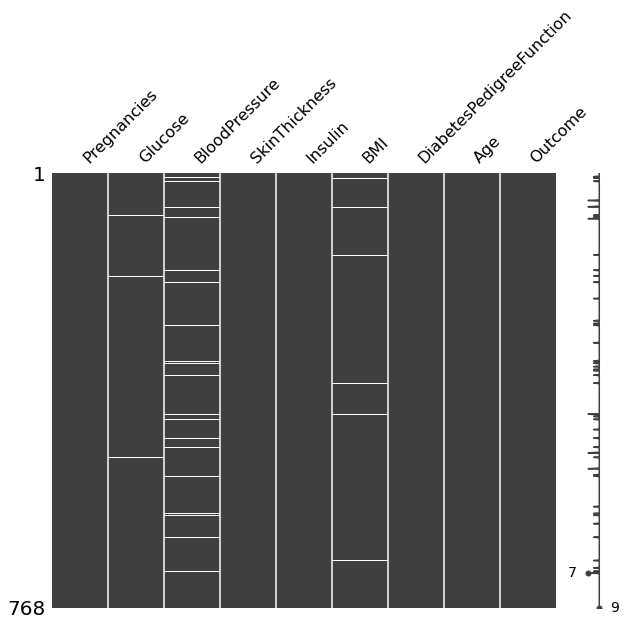

In [12]:
msno.matrix(df1,figsize=(10,8))
plt.show()

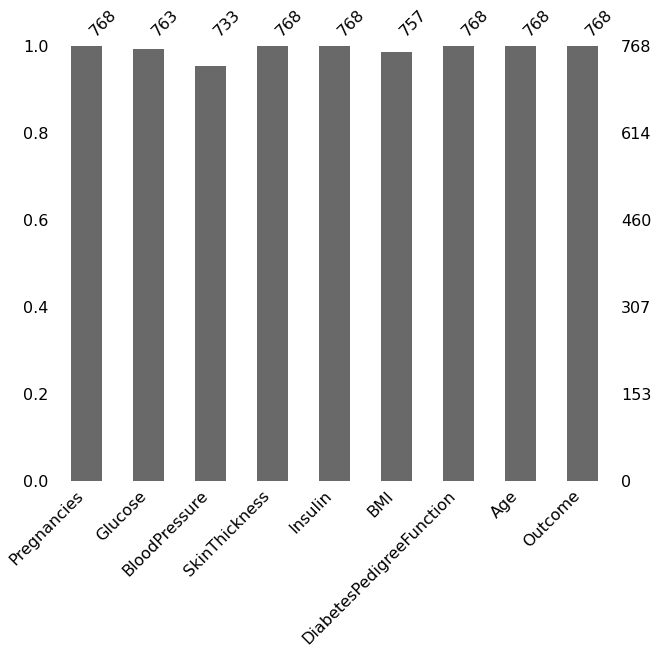

In [13]:
msno.bar(df1,figsize=(10,8))
plt.show()


In [14]:
df1.dropna(inplace = True)


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    int64  
 1   Glucose                   724 non-null    float64
 2   BloodPressure             724 non-null    float64
 3   SkinThickness             724 non-null    int64  
 4   Insulin                   724 non-null    int64  
 5   BMI                       724 non-null    float64
 6   DiabetesPedigreeFunction  724 non-null    float64
 7   Age                       724 non-null    int64  
 8   Outcome                   724 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 56.6 KB


#***Standartlaştırma*** 

In [16]:
from sklearn.preprocessing import RobustScaler



rob_scaler = RobustScaler()
df1['Pregnancies'] = rob_scaler.fit_transform(df1['Pregnancies'].values.reshape(-1,1))
df1['Glucose'] = rob_scaler.fit_transform(df1['Glucose'].values.reshape(-1,1))
df1['BloodPressure'] = rob_scaler.fit_transform(df1['BloodPressure'].values.reshape(-1,1))
df1['BMI'] = rob_scaler.fit_transform(df1['BMI'].values.reshape(-1,1))
df1['DiabetesPedigreeFunction'] = rob_scaler.fit_transform(df1['DiabetesPedigreeFunction'].values.reshape(-1,1))
df1['Age'] = rob_scaler.fit_transform(df1['Age'].values.reshape(-1,1))
df1['Insulin'] = rob_scaler.fit_transform(df1['Insulin'].values.reshape(-1,1))
df1['SkinThickness'] = rob_scaler.fit_transform(df1['SkinThickness'].values.reshape(-1,1))
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.6,0.733728,0.000,0.333333,-0.367816,0.131868,0.648366,1.235294,1
1,-0.4,-0.757396,-0.375,0.151515,-0.367816,-0.637363,-0.073203,0.117647,0
2,1.0,1.562130,-0.500,-0.727273,-0.367816,-1.000000,0.766013,0.176471,1
3,-0.4,-0.662722,-0.375,-0.030303,0.352490,-0.472527,-0.554248,-0.470588,0
4,-0.6,0.473373,-2.000,0.333333,0.919540,1.175824,4.990850,0.235294,1


In [17]:
# veri setini train ve test olarak ayırıyoruz

from sklearn.model_selection import train_test_split

X = df1.drop("Outcome", axis=1)
y = df1["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)



---

*Dengesiz Veri Seti*

---



In [18]:
y_train.value_counts()    


0    377
1    202
Name: Outcome, dtype: int64



---


#GAUSSIAN-NB

---



In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,f1_score,recall_score,roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score

from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [20]:
gaussianNB = GaussianNB()
gaussianNB = gaussianNB.fit(X_train, y_train)

train_pred_gaussianNB = gaussianNB.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_gaussianNB)*100))

print("Confusion Matrix-GaussianNB-Train: ")
print(confusion_matrix(y_train, train_pred_gaussianNB))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_gaussianNB))

print("-"*40)

test_pred_gaussianNB = gaussianNB.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_gaussianNB)*100))

print("Confusion Matrix-GaussianNB-Test: ")
print(confusion_matrix(y_test, test_pred_gaussianNB))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_gaussianNB))

Train Accuracy : 77.202% 
Confusion Matrix-GaussianNB-Train: 
[[322  55]
 [ 77 125]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       377
           1       0.69      0.62      0.65       202

    accuracy                           0.77       579
   macro avg       0.75      0.74      0.74       579
weighted avg       0.77      0.77      0.77       579

----------------------------------------
Test Accuracy  : 74.483% 
Confusion Matrix-GaussianNB-Test: 
[[81 17]
 [20 27]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        98
           1       0.61      0.57      0.59        47

    accuracy                           0.74       145
   macro avg       0.71      0.70      0.70       145
weighted avg       0.74      0.74      0.74       145



0.7364616435118313

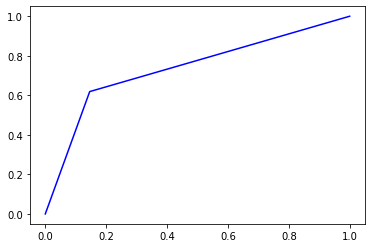

In [21]:
fpr , tpr , thresolds = metrics.roc_curve(y_train , train_pred_gaussianNB)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

0.7004993486756405

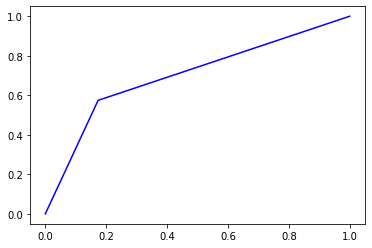

In [22]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_gaussianNB)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---
GaussianNB Hiperparametre ile

---




In [23]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB,  
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

grid_predictions = gs_NB.predict(X_test)
 
# Sınıflandırma raporunu yazdırmak
print(classification_report(y_test, grid_predictions))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        98
           1       0.61      0.49      0.54        47

    accuracy                           0.73       145
   macro avg       0.69      0.67      0.68       145
weighted avg       0.72      0.73      0.72       145



In [24]:
print("En İyi Parametrelerin Verdiği Skor:",gs_NB.best_score_)

En İyi Parametrelerin Verdiği Skor: 0.768575712143928




---



#**BERNOULLI NB**



---



In [25]:
from sklearn.naive_bayes import BernoulliNB

bernoulliNB = BernoulliNB()
bernoulliNB.fit(X_train, y_train)

train_pred_bernoulliNB = bernoulliNB.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_bernoulliNB)*100))

print("Confusion Matrix-BernoulliNB-Train: ")
print(confusion_matrix(y_train, train_pred_bernoulliNB))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_bernoulliNB))

print("-"*40)


test_pred_bernoulliNB = bernoulliNB.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_bernoulliNB)*100))

print("Confusion Matrix-BernoulliNB-Test: ")
print(confusion_matrix(y_test, test_pred_bernoulliNB))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_bernoulliNB))





Train Accuracy : 72.021% 
Confusion Matrix-BernoulliNB-Train: 
[[303  74]
 [ 88 114]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       377
           1       0.61      0.56      0.58       202

    accuracy                           0.72       579
   macro avg       0.69      0.68      0.69       579
weighted avg       0.72      0.72      0.72       579

----------------------------------------
Test Accuracy  : 76.552% 
Confusion Matrix-BernoulliNB-Test: 
[[85 13]
 [21 26]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        98
           1       0.67      0.55      0.60        47

    accuracy                           0.77       145
   macro avg       0.73      0.71      0.72       145
weighted avg       0.76      0.77      0.76       145



0.6840349817475117

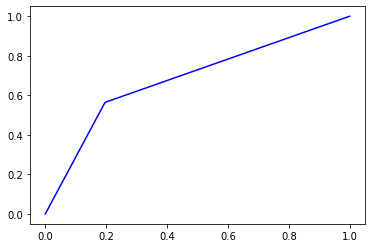

In [26]:
fpr , tpr , thresolds = metrics.roc_curve(y_train, train_pred_bernoulliNB)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



0.7102692140686062

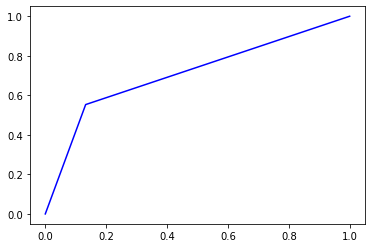

In [27]:


fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_bernoulliNB)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---
BernoulliNB Hiperparametre İle

---




In [28]:
from sklearn.naive_bayes import BernoulliNB



In [29]:
parameters = [{'alpha':np.linspace(0.1,1,10)}]

clf = GridSearchCV(BernoulliNB(), parameters, scoring='f1')
clf.fit(X_train,y_train) 

# En iyi parametreyi yazdırmak
print("\n",clf.best_params_)
# Hiperparametre ayarından sonra modelimizin nasıl göründüğünü yazdır
print("\n",clf.best_estimator_)

clf_pre = clf.predict(X_test)

print(classification_report(y_test , clf_pre))


 {'alpha': 0.1}

 BernoulliNB(alpha=0.1)
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        98
           1       0.67      0.55      0.60        47

    accuracy                           0.77       145
   macro avg       0.73      0.71      0.72       145
weighted avg       0.76      0.77      0.76       145



In [30]:
print("En İyi Parametrelerin Verdiği Skor:",clf.best_score_)

En İyi Parametrelerin Verdiği Skor: 0.5917210075437924




---



#**LogisticRegression**



---



In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [32]:
logisticRegression = LogisticRegression(random_state=123456)
logisticRegression.fit(X_train, y_train)


train_pred_logisticRegression = logisticRegression.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_logisticRegression)*100))

print("Confusion Matrix-LogisticRegression-Train: ")
print(confusion_matrix(y_train, train_pred_logisticRegression))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_logisticRegression))

print("-"*40)

test_pred_logisticRegression = logisticRegression.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_logisticRegression)*100))

print("Confusion Matrix-LogisticRegression-Test: ")
print(confusion_matrix(y_test, test_pred_logisticRegression))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_logisticRegression))

Train Accuracy : 78.756% 
Confusion Matrix-LogisticRegression-Train: 
[[336  41]
 [ 82 120]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       377
           1       0.75      0.59      0.66       202

    accuracy                           0.79       579
   macro avg       0.77      0.74      0.75       579
weighted avg       0.78      0.79      0.78       579

----------------------------------------
Test Accuracy  : 75.862% 
Confusion Matrix-LogisticRegression-Test: 
[[88 10]
 [25 22]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.78      0.90      0.83        98
           1       0.69      0.47      0.56        47

    accuracy                           0.76       145
   macro avg       0.73      0.68      0.70       145
weighted avg       0.75      0.76      0.74       145



0.7426530451453633

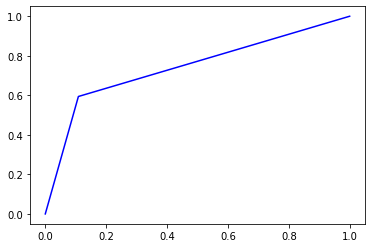

In [33]:
fpr , tpr , thresolds = metrics.roc_curve(y_train, train_pred_logisticRegression)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

0.6830221450282241

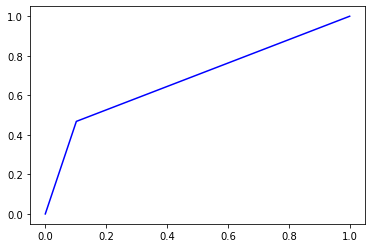

In [34]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_logisticRegression)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---
Logistic Regression Hiperparametreler İle

---




In [35]:
param ={"C":np.logspace(20,40,60), "penalty":["l2","none"]}  # logistic regresyon tekrar bak 

cv = GridSearchCV(LogisticRegression(), param, scoring = 'accuracy', cv=5,n_jobs=-1).fit(X_train,y_train)
print("En İyi Parametrelerin Verdiği Skor:",cv.best_score_)

En İyi Parametrelerin Verdiği Skor: 0.777256371814093




---



#**DECISION TREE**



---



In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [37]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

train_pred_decision_tree = decision_tree.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_decision_tree)*100))

print("Confusion Matrix-DecisionTreeClassifier-Train: ")
print(confusion_matrix(y_train, train_pred_decision_tree))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_decision_tree))

print("-"*40)

test_pred_decision_tree = decision_tree.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_decision_tree)*100))

print("Confusion Matrix-DecisionTreeClassifier-Test: ")
print(confusion_matrix(y_test, test_pred_decision_tree))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_decision_tree))

Train Accuracy : 100.000% 
Confusion Matrix-DecisionTreeClassifier-Train: 
[[377   0]
 [  0 202]]

Model Sonuçları

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00       202

    accuracy                           1.00       579
   macro avg       1.00      1.00      1.00       579
weighted avg       1.00      1.00      1.00       579

----------------------------------------
Test Accuracy  : 68.276% 
Confusion Matrix-DecisionTreeClassifier-Test: 
[[71 27]
 [19 28]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.79      0.72      0.76        98
           1       0.51      0.60      0.55        47

    accuracy                           0.68       145
   macro avg       0.65      0.66      0.65       145
weighted avg       0.70      0.68      0.69       145



1.0

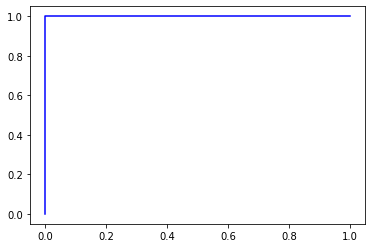

In [38]:
fpr , tpr , thresolds = metrics.roc_curve(y_train, train_pred_decision_tree)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

0.6601172383847156

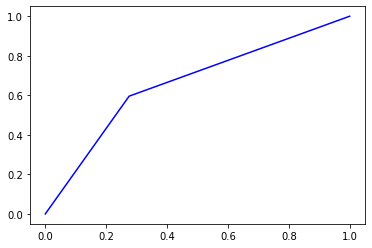

In [39]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_decision_tree)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

---
Decision Tree Hiperparametreler İle

---




In [40]:
param_dict= {"criterion":['gini' , 'entropy'],
             "max_depth"          : range(1,8),
             "min_samples_split"  : range(1,10),
             "min_samples_leaf"   : range(1,5), 
            }

detr=DecisionTreeClassifier()

detr_cv = GridSearchCV (detr,param_dict, verbose=0)
detr_cv.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
280 fits failed out of a total of 2520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
280 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 8),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)})

In [41]:
detr_cv.best_params_

grid_dt_predictions = detr_cv.predict(X_test)
 
# Sınıflandırma raporunu yazdırmak
print(classification_report(y_test, grid_dt_predictions))
print("En İyi Parametrelerin Verdiği Skor:",detr_cv.best_score_)

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        98
           1       0.62      0.51      0.56        47

    accuracy                           0.74       145
   macro avg       0.70      0.68      0.69       145
weighted avg       0.73      0.74      0.73       145

En İyi Parametrelerin Verdiği Skor: 0.7564467766116941




---



#**SVM (SUPPORT VECTOR MACHINE)**



---



In [44]:
from sklearn import svm
from sklearn.svm import SVC

sv = svm.SVC(kernel='linear') 
sv.fit(X_train , y_train)

train_pred_svm =  sv.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_svm)*100))

print("Confusion Matrix-SVM TRAIN: ")
print(confusion_matrix(y_train, train_pred_svm))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_svm))

print("-"*40)

test_pred_svm = sv.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_svm)*100))

print("Confusion Matrix-SVM TEST: ")
print(confusion_matrix(y_test, test_pred_svm))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_svm))

Train Accuracy : 78.584% 
Confusion Matrix-SVM TRAIN: 
[[335  42]
 [ 82 120]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       377
           1       0.74      0.59      0.66       202

    accuracy                           0.79       579
   macro avg       0.77      0.74      0.75       579
weighted avg       0.78      0.79      0.78       579

----------------------------------------
Test Accuracy  : 72.414% 
Confusion Matrix-SVM TEST: 
[[85 13]
 [27 20]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        98
           1       0.61      0.43      0.50        47

    accuracy                           0.72       145
   macro avg       0.68      0.65      0.65       145
weighted avg       0.71      0.72      0.71       145



0.7413267851984138

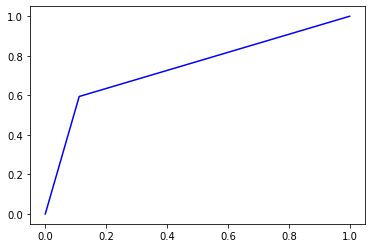

In [45]:
fpr , tpr , thresolds = metrics.roc_curve(y_train, train_pred_svm)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

0.6464394268345636

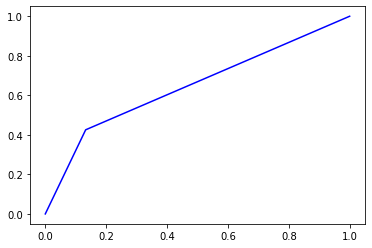

In [46]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_svm)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---
SVM Hiperparametre İle


---




In [49]:
#Parametrenin Sınırlarını Belirtme

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [ 0.0001 , 0.01 , 0.1 , 1],
              'kernel': ['rbf']}
model=SVC()
grid_svm = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)


#Modeli Fitlemek
grid_svm.fit(X_train, y_train)
print("En İyi Parametrelerin Verdiği Skor:",grid_svm.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
En İyi Parametrelerin Verdiği Skor: 0.7755172413793104


In [50]:
plot_roc_curve(grid_svm, X_test , y_test)

NameError: ignored



---



#**KNN (K-NEAREST NEIGHBORS)**



---



In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train , y_train)

train_pred_knn =  knn.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_knn)*100))

print("Confusion Matrix-KNN TRAIN: ")
print(confusion_matrix(y_train, train_pred_knn))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_knn))

print("-"*40)

test_pred_knn = knn.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_knn)*100))

print("Confusion Matrix-KNN TEST: ")
print(confusion_matrix(y_test, test_pred_knn))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_knn))

Train Accuracy : 81.002% 
Confusion Matrix-KNN TRAIN: 
[[333  44]
 [ 66 136]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       377
           1       0.76      0.67      0.71       202

    accuracy                           0.81       579
   macro avg       0.80      0.78      0.79       579
weighted avg       0.81      0.81      0.81       579

----------------------------------------
Test Accuracy  : 73.793% 
Confusion Matrix-KNN TEST: 
[[82 16]
 [22 25]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        98
           1       0.61      0.53      0.57        47

    accuracy                           0.74       145
   macro avg       0.70      0.68      0.69       145
weighted avg       0.73      0.74      0.73       145



0.6843247937472862

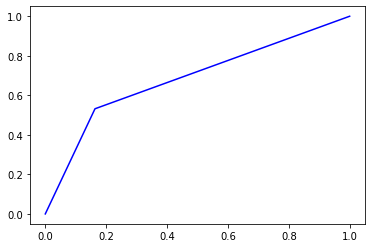

In [52]:
fpr , tpr , thresolds = metrics.roc_curve(y_test,test_pred_knn)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---



*KNN modeli için hiperparametreleri bulma*

---



In [53]:
#KNN modelinde en iyi parametreleri bulmak için üç önemli parametreyi aldık. Değer aralıklarını belirtip GridSearchCV ile en iyi sonucu veren parametreleri tespit ettik.



stratified_kfold = StratifiedKFold(n_splits=5,   #Diğerlerinden farklı olarak burada Straified K Fold Cross-Validation kullanıldı.)
                                       shuffle=False,
                                       random_state=None)

param_grid = {
              'n_neighbors': [3, 5, 11, 19],
              'weights': ['uniform'  , 'distance'],
              'metric': ['euclideans', 'manhattan']
              }
model = KNeighborsClassifier()
grid_search = GridSearchCV(model, param_grid,scoring='roc_auc', refit = True, cv=stratified_kfold,  verbose = 1)


grid_search.fit(X_train, y_train)

 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neig

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclideans', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc', verbose=1)

In [54]:
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score} \n Test score: {test_score}')


Cross-validation score: 0.8154442661531878 
 Test score: 0.834672166739036


In [59]:
#KNN için en iyi parametreleri bulduk ve aşağıda modelimizin bu parametrelerle çıkan sonucunu görüyoruz.

knn_predict = grid_search.predict(X_test)
 
# Sınıflandırma raporunu yazdır
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85        98
           1       0.77      0.49      0.60        47

    accuracy                           0.79       145
   macro avg       0.78      0.71      0.73       145
weighted avg       0.78      0.79      0.77       145



In [60]:
print("En İyi Parametrelerin Verdiği Skor:",grid_search.best_score_)

En İyi Parametrelerin Verdiği Skor: 0.8154442661531878


In [64]:
from sklearn.metrics import plot_roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


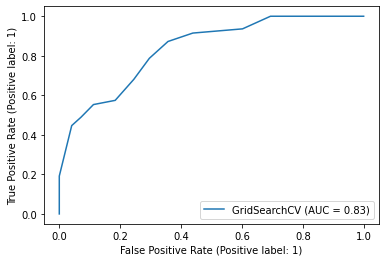

In [66]:
plot_roc_curve(grid_search, X_test, y_test)



---



#**MLP (MULTILAYER PERCEPTRON)**



---



In [67]:
from sklearn.neural_network import MLPClassifier

In [68]:
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train , y_train)


train_pred_mlp =  mlp.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_mlp)*100))

print("Confusion Matrix-KNN TRAIN: ")
print(confusion_matrix(y_train, train_pred_mlp))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_mlp))

print("-"*40)

test_pred_mlp = mlp.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_mlp)*100))

print("Confusion Matrix-KNN TEST: ")
print(confusion_matrix(y_test, test_pred_mlp))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_mlp))

Train Accuracy : 93.782% 
Confusion Matrix-KNN TRAIN: 
[[360  17]
 [ 19 183]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       377
           1       0.92      0.91      0.91       202

    accuracy                           0.94       579
   macro avg       0.93      0.93      0.93       579
weighted avg       0.94      0.94      0.94       579

----------------------------------------
Test Accuracy  : 71.724% 
Confusion Matrix-KNN TEST: 
[[80 18]
 [23 24]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        98
           1       0.57      0.51      0.54        47

    accuracy                           0.72       145
   macro avg       0.67      0.66      0.67       145
weighted avg       0.71      0.72      0.71       145



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.6634824142422926

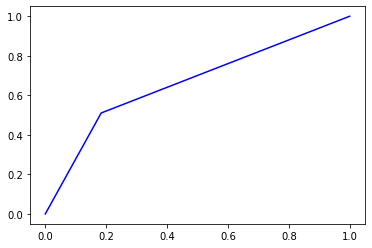

In [71]:
fpr , tpr , thresolds = metrics.roc_curve(y_test,test_pred_mlp)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---
Hiperparametre ile MLP

---





In [73]:
mlp_gs = MLPClassifier(max_iter=1000)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=5, cv=5)
clf.fit(X_test, y_test) 

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000), n_jobs=5,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [74]:
grid_predictions = mlp.predict(X_test)

print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        98
           1       0.57      0.51      0.54        47

    accuracy                           0.72       145
   macro avg       0.67      0.66      0.67       145
weighted avg       0.71      0.72      0.71       145



Hiperparametre ile Grafik

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


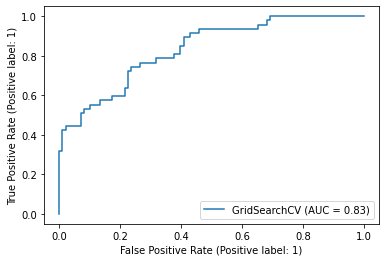

In [75]:
plot_roc_curve(clf, X_test, y_test)



---



#**RANDOM FOREST**



---



In [76]:
from sklearn.ensemble import RandomForestClassifier as randomForest
from sklearn.model_selection import KFold, train_test_split, cross_val_predict, cross_val_score
from sklearn import metrics


In [77]:
randomForest = randomForest()
randomForest.fit(X_train,y_train)

train_pred_randomForest = randomForest.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_randomForest)*100))
print("Confusion Matrix-randomForest-Train: ")
print(confusion_matrix(y_train, train_pred_randomForest))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_randomForest))

print("-"*40)

test_pred_randomForest = randomForest.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_randomForest)*100))

print("Confusion Matrix-randomForest-Test: ")
print(confusion_matrix(y_test, test_pred_randomForest))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_randomForest))

Train Accuracy : 100.000% 
Confusion Matrix-randomForest-Train: 
[[377   0]
 [  0 202]]

Model Sonuçları

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00       202

    accuracy                           1.00       579
   macro avg       1.00      1.00      1.00       579
weighted avg       1.00      1.00      1.00       579

----------------------------------------
Test Accuracy  : 76.552% 
Confusion Matrix-randomForest-Test: 
[[84 14]
 [20 27]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        98
           1       0.66      0.57      0.61        47

    accuracy                           0.77       145
   macro avg       0.73      0.72      0.72       145
weighted avg       0.76      0.77      0.76       145



1.0

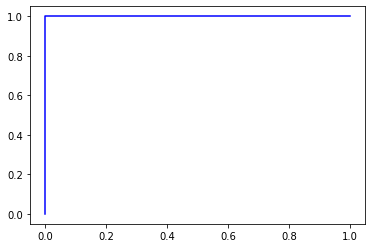

In [78]:
fpr , tpr , thresolds = metrics.roc_curve(y_train, train_pred_randomForest)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

0.7158054711246201

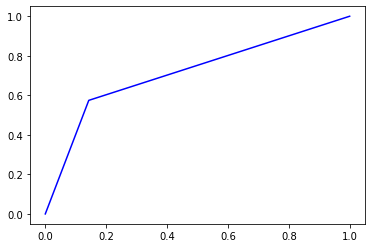

In [79]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_randomForest)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---
Random Forest Hiperparametre İle


---




In [80]:
rf_params = {
            'max_depth': [10, 50, None],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 10],
            'n_estimators': [200, 400, 2000]
             }

cv_rf = GridSearchCV(randomForest,rf_params,cv=5,verbose=False,n_jobs=-1).fit(X_test,y_test)

In [81]:
print("En İyi Parametrelerin Verdiği Skor:",cv_rf.best_score_)

En İyi Parametrelerin Verdiği Skor: 0.7310344827586207


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


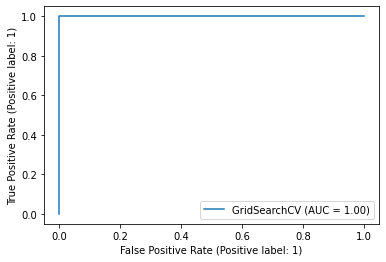

In [82]:
plot_roc_curve(cv_rf, X_test, y_test)



---



#**GRADIENT BOOSTING**



---



In [83]:
from sklearn.ensemble import GradientBoostingClassifier  as gradientBoosting

In [84]:
gradientBoosting = gradientBoosting()
gradientBoosting.fit(X_train, y_train)

train_pred_gradientBoosting = gradientBoosting.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_gradientBoosting)*100))

print("Confusion Matrix-gradientBoosting-Train: ")
print(confusion_matrix(y_train, train_pred_gradientBoosting))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_gradientBoosting))

print("-"*40)

test_pred_gradientBoosting = gradientBoosting.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_gradientBoosting)*100))

print("Confusion Matrix-gradientBoosting-Test: ")
print(confusion_matrix(y_test, test_pred_gradientBoosting))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_gradientBoosting))

Train Accuracy : 93.264% 
Confusion Matrix-gradientBoosting-Train: 
[[369   8]
 [ 31 171]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       377
           1       0.96      0.85      0.90       202

    accuracy                           0.93       579
   macro avg       0.94      0.91      0.92       579
weighted avg       0.93      0.93      0.93       579

----------------------------------------
Test Accuracy  : 73.793% 
Confusion Matrix-gradientBoosting-Test: 
[[82 16]
 [22 25]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.79      0.84      0.81        98
           1       0.61      0.53      0.57        47

    accuracy                           0.74       145
   macro avg       0.70      0.68      0.69       145
weighted avg       0.73      0.74      0.73       145



In [85]:
from sklearn.ensemble import GradientBoostingClassifier  as gradientBoosting

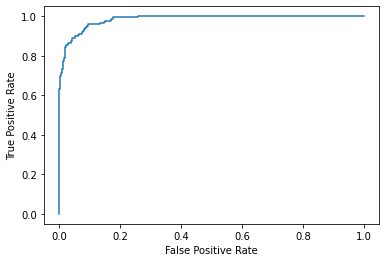

In [86]:
clf = make_pipeline(StandardScaler(), gradientBoosting())
clf.fit(X_train,y_train)
y_score = clf.decision_function(X_train)

fpr, tpr, _ = roc_curve(y_train, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

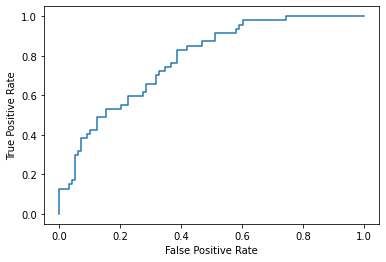

In [87]:
clf = make_pipeline(StandardScaler(), gradientBoosting())
clf.fit(X_train,y_train)
y_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()



---
Gradient Boosting Hiperparametre İle


---




In [88]:
from sklearn.ensemble import GradientBoostingClassifier  as gradientBoosting


param    = {
              "criterion": ["friedman_mse"],
              "loss":["deviance","exponential"],
              "max_features":["log2","sqrt"],
              'learning_rate': [0.01,0.05,0.1,1,0.5], 
              'max_depth': [3,4,5],
              'min_samples_leaf': [4,5,6],

              'subsample': [0.6,0.7,0.8],
              'n_estimators': [5,10,15,20],
              
            }
    
model_gboosting = gradientBoosting()
grid_gb  = GridSearchCV(model_gboosting , param , verbose=1).fit(X_test,y_test)
print("En İyi Parametrelerin Verdiği Skor:",grid_gb.best_score_)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits
En İyi Parametrelerin Verdiği Skor: 0.7724137931034483




---



#**XG BOOST**



---



In [89]:
import xgboost as xgb
from xgboost import XGBClassifier as xgBoost


In [90]:
xgBoost = xgBoost(use_label_encoder=False,eval_metric = 'error')

xgBoost.fit(X_train, y_train)

train_pred_xgBoost = xgBoost.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_xgBoost)*100))

print("Confusion Matrix-xgBoost-Train: ")
print(confusion_matrix(y_train, train_pred_xgBoost))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_xgBoost))

print("-"*40)

test_pred_xgBoost = xgBoost.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_xgBoost)*100))

print("Confusion Matrix-xgBoost-Test: ")
print(confusion_matrix(y_test, test_pred_xgBoost))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_xgBoost))

Train Accuracy : 89.465% 
Confusion Matrix-xgBoost-Train: 
[[354  23]
 [ 38 164]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       377
           1       0.88      0.81      0.84       202

    accuracy                           0.89       579
   macro avg       0.89      0.88      0.88       579
weighted avg       0.89      0.89      0.89       579

----------------------------------------
Test Accuracy  : 73.793% 
Confusion Matrix-xgBoost-Test: 
[[81 17]
 [21 26]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        98
           1       0.60      0.55      0.58        47

    accuracy                           0.74       145
   macro avg       0.70      0.69      0.69       145
weighted avg       0.73      0.74      0.73       145



0.8754366152795651

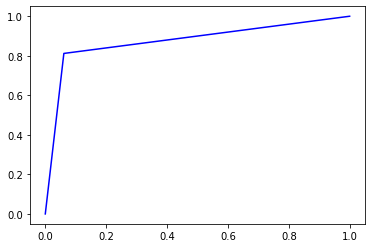

In [91]:
fpr , tpr , thresolds = metrics.roc_curve(y_train, train_pred_xgBoost)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

0.6898610508033001

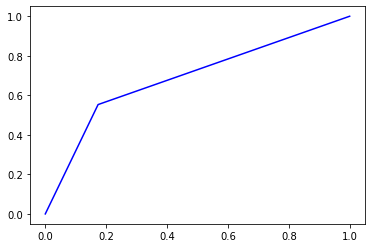

In [92]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_xgBoost)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---
XGBoost Hiperparametreler İle


---




In [93]:
from xgboost import XGBClassifier
model_xgb   = XGBClassifier(seed=None)
parameters  = {
                "max_depth": range (2, 10, 1),
                "n_estimators": range(60, 220, 40),
                "learning_rate": [0.1, 0.01, 0.05]
                }

grid_xgb   = GridSearchCV (model_xgb , parameters, verbose=1) 

grid_xgb.fit (X_train , y_train)
print("En İyi Parametrelerin Verdiği Skor:",grid_xgb.best_score_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
En İyi Parametrelerin Verdiği Skor: 0.7720839580209896


In [94]:
grid_xgb.best_params_

predictions_xgb = grid_xgb.predict(X_test)

print(classification_report(y_test , predictions_xgb))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        98
           1       0.68      0.60      0.64        47

    accuracy                           0.78       145
   macro avg       0.75      0.73      0.74       145
weighted avg       0.77      0.78      0.78       145



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


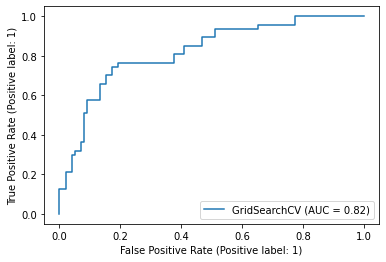

In [95]:
plot_roc_curve(grid_xgb, X_test, y_test)